# TP logistic regression
Diane Lingrand (diane.lingrand@univ-cotedazur)

M1 - DSAI - 2020-21

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

## dataset: MNIST

In [1]:
#necessary imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
import random as rd

In [2]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def normalize(dataset):
    return dataset/255.

x_train, x_test = normalize(x_train), normalize(x_test)

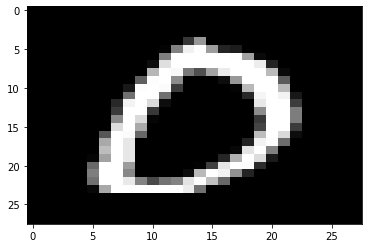

In [3]:
#display one of the pictures (the 11th in this code)
import matplotlib.pyplot as plt
i = rd.randint(0,len(x_train))
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()

In [4]:
# case of binary classification

# you can change the classes
class1 = 4 #negative class
class2 = 8 #positive class
nameClass1 = '4'
nameClass2 = '8'
mesClassesTrain = (y_train==class1)|(y_train==class2)
mesClassesTest = (y_test==class1)|(y_test==class2)

## TRAIN
x_trainBinaire = np.array(x_train[mesClassesTrain,:])
y_trainBinaire = np.array((y_train[mesClassesTrain]-class1)/(class2-class1))

## TEST
x_testBinaire = np.array(x_test[mesClassesTest,:])
y_testBinaire = np.array((y_test[mesClassesTest]-class1)/(class2-class1))

In [5]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_trainBinaire.shape[0]
x_trainBinaireLin = x_trainBinaire.reshape(n,-1)
#test
n = x_testBinaire.shape[0]
x_testBinaireLin = x_testBinaire.reshape(n,-1)

In [6]:
#default constructor
myRegLog = LogisticRegression(max_iter=300,solver="liblinear")
#learning
myRegLog.fit(x_trainBinaireLin,y_trainBinaire)
print("learning done")

learning done


You may read an error message. What does it mean? However, it is possible to measure the performance of the learned classification method.

F1 score :  0.9927760577915377


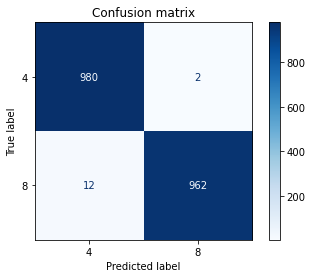

In [7]:
y_predBinaireTest = myRegLog.predict(x_testBinaireLin)

disp = plot_confusion_matrix(myRegLog, x_testBinaireLin, y_testBinaire,
                                 display_labels=[nameClass1,nameClass2],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_predBinaireTest,y_testBinaire))

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ?

## The whole dataset with the 10 classes

In [8]:
# reading the dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = normalize(x_train), normalize(x_test)

4423680/4422102 [==============================] - 1s 0us/step


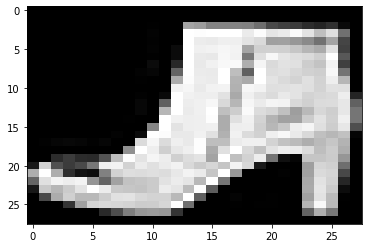

In [9]:
i = rd.randint(0,len(x_train))
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()

In [10]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_train = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_test = x_test.reshape(n,-1)

In [11]:
#newton-cg constructor
myRegLog = LogisticRegression(max_iter=200,solver="liblinear")
#learning
myRegLog.fit(x_train,y_train)
print("learning done")

learning done


F1 score :  0.8428727333820559


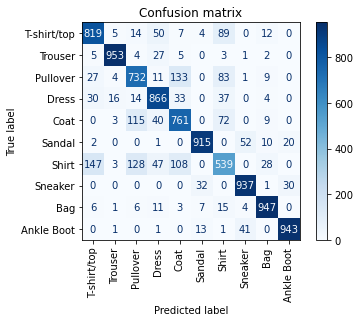

In [12]:
y_pred = myRegLog.predict(x_test)

labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker", "Bag", "Ankle Boot"]

disp = plot_confusion_matrix(myRegLog, x_test, y_test,
                             display_labels=labels,
                             cmap=plt.cm.Blues,
                             normalize=None,
                             xticks_rotation='vertical')

disp.ax_.set_title('Confusion matrix')
print("F1 score : ", f1_score(y_pred,y_test,average="weighted"))